In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats

In [ ]:
# This notebook generates some "shotgun" datasets -- a dataset with three
# completely artificial classes centered around 10 subcluster centers 
# for each class.  The vector space of the data is just 2d; we can fit a 
# logisitic regression classifier to 

(1000, 2)

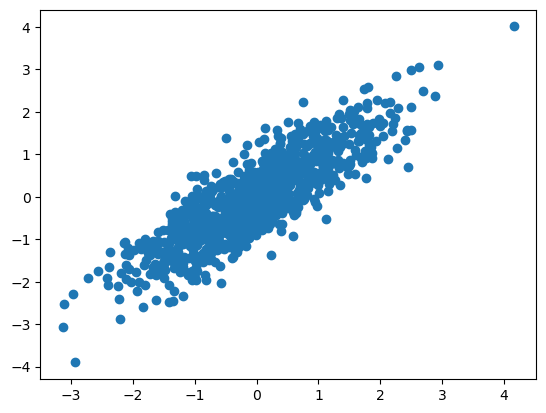

In [3]:
r = 0.85
#You can generate n identical multivariate normals 
# with this funciton, but can't generate n different
# MVNs at once.
a = scipy.stats.multivariate_normal.rvs(mean=[0,0], cov=np.array([[1, r], [r, 1]]), size=1000)
plt.plot(a[:,0], a[:,1], 'o')
a.shape

In [4]:
means_1 = scipy.stats.multivariate_normal.rvs(mean=[0,1], cov=np.array([[1, r], [r, 1]]), size=10)
means_2 = scipy.stats.multivariate_normal.rvs(mean=[1,0], cov=np.array([[1, r], [r, 1]]), size=10)
means_3 = scipy.stats.multivariate_normal.rvs(mean=[0,0], cov=np.array([[1, r], [r, 1]]), size=10)

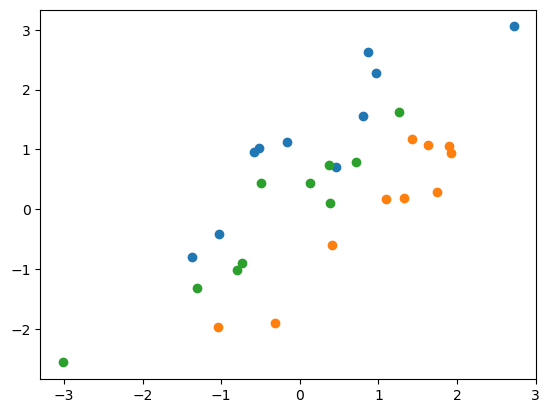

In [5]:
plt.scatter(means_1[:,0], means_1[:,1])
plt.scatter(means_2[:,0], means_2[:,1])
plt.scatter(means_3[:,0], means_3[:,1])


In [6]:
means = [means_1, means_2, means_3]

In [8]:
# generate some data..
Rexp = 0.5
def generate_some_data(means):
    points = []
    for m in means:
        for i in range(len(m)):
            # m[i] is the x1, x2 center of a cluster
            z = scipy.stats.expon.rvs(loc = m[i], scale=Rexp)
            print (z)
            points.append( z)
    return(points)
points = generate_some_data(means)

[1.33474454 2.95239685]
[-0.43940499  0.34212685]
[0.28838216 1.35234984]
[2.84131981 3.87330594]
[1.42579136 3.08560966]
[1.44495183 3.27088687]
[0.28573271 2.8855582 ]
[0.66830243 1.0493437 ]
[-1.17446105 -0.44625441]
[-0.45854893  0.98902969]
[2.69844466 1.26878123]
[1.94010808 1.8164334 ]
[-0.99072765 -0.40864954]
[2.65159552 3.16616274]
[3.14937367 2.95206599]
[1.88577377 1.43386965]
[ 0.63626211 -0.57386116]
[-0.19282854 -1.80433653]
[1.6946106  0.24388892]
[2.07496681 0.32917077]
[ 0.25805649 -0.68530724]
[0.97240674 1.07536561]
[-1.14577202 -1.08727304]
[0.74028392 0.83219543]
[0.01979344 0.53412906]
[1.88548372 1.75643792]
[-0.42689555 -0.85519135]
[0.99261423 2.8735952 ]
[-2.11518887 -0.98486341]
[0.80731787 2.94409153]


In [9]:
points = np.array(points)  # cleanup from list-of-arrays to 2d array

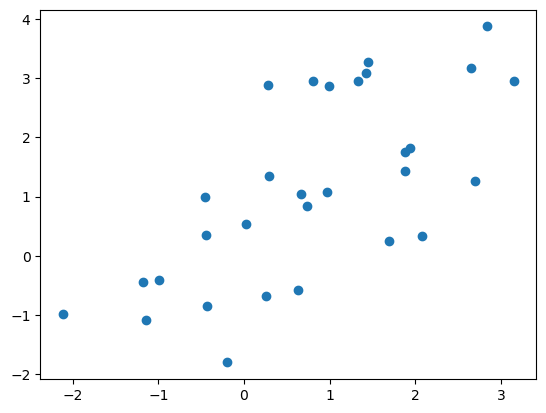

In [10]:
plt.plot(points[:,0], points[:,1], 'o')

In [11]:
# Keep track of cluster IDs... do it more times...
Rexp = 0.1
def generate_some_data(means, n = 100 ):
    points = []
    labels = []
    for j in range(n):
        for m in range(len(means)):
            for i in range(len(means[m])):
                # means[m][i] is the x1, x2 center of a cluster
                z = scipy.stats.expon.rvs(loc = means[m][i], scale=Rexp)
                points.append( z)
                labels.append(m)
    return(np.array(points), labels)
points, labels = generate_some_data(means)

In [12]:
colormap = {0: "r", 1: "b", 2: "g"} 
c = [colormap[i] for i in labels]
len(points), len(c), points.shape

(3000, 3000, (3000, 2))

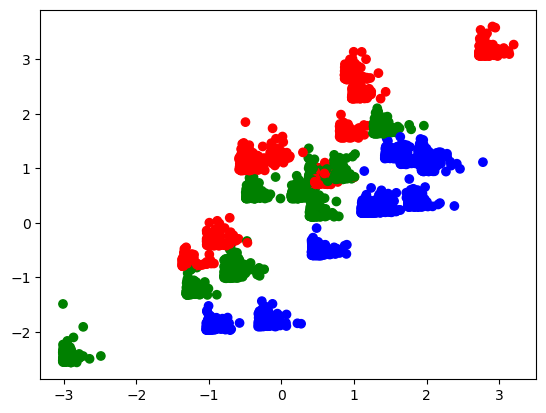

In [13]:
plt.scatter(points[:,0], points[:,1], c=c )

In [ ]:
# This is not quite right; my "exponential" functions are always positive.
# 

In [14]:
# Change this random within-cluster function to laplace distribution 
Rexp = 0.1
def generate_some_data(means, n = 100 ):
    points = []
    labels = []
    for j in range(n):
        for m in range(len(means)):
            for i in range(len(means[m])):
                # means[m][i] is the x1, x2 center of a cluster
                z = scipy.stats.laplace.rvs(loc = means[m][i], scale=Rexp)
                points.append( z)
                labels.append(m)
    return(np.array(points), labels)
points, labels = generate_some_data(means)

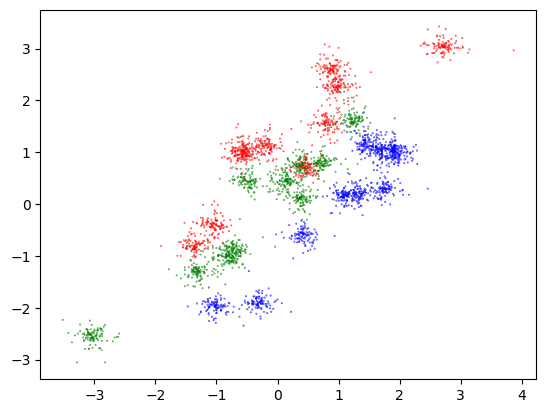

In [16]:
colormap = {0: "r", 1: "b", 2: "g"} 
c = [colormap[i] for i in labels]
len(points), len(c), points.shape
plt.scatter(points[:,0], points[:,1], c=c, s=0.1)

In [ ]:
# I know the density precisely; I just have to sum over 30 two-dimensional Laplace densities:



In [17]:
def shotgun_density(x, means):
    density = []
    for m in range(len(means)):  # there are m clusters 
            p=0
            for i in range(len(means[m])):   # there are len(means[m]) subclusters
                # means[m][i] is the x1, x2 center of a cluster
                p = p+ scipy.stats.laplace.pdf(x, loc = means[m][i], scale=Rexp)
            density.append(p)
            print("x", x, "p", p)
    return(np.array(density))
shotgun_density([0,0],means)

x [0, 0] p [1.10918186 0.08120681]
x [0, 0] p [0.27979778 1.92362363]
x [0, 0] p [1.57448844 1.87492481]


array([[1.10918186, 0.08120681],
       [0.27979778, 1.92362363],
       [1.57448844, 1.87492481]])

In [ ]:
# This is funny... you give scipy.stats.laplace.pdf ( x = [0,0] and means = [0,0] ) 
# and it returns TWO numbers... oh, dear.  scipy.stats.laplace is a 1d function.

# This was fine for generating shotgun-like clusters, but is not fine for calculating 
# the density.  Does this mean I have to do calculus?  Meh, everything has the same
# normalization constant if Rexp is the same for all 30 distributions.. 

In [21]:
def shotgun_density(x, means=means):
    density = []
    for m in range(len(means)):  # there are m clusters 
            p=0
            for i in range(len(means[m])):   # there are len(means[m]) subclusters
                # means[m][i] is the x1, x2 center of a cluster
                p = p+ np.exp ( - np.sqrt(np.sum( ( x-means[m][i]) **2 / 2 / Rexp**2)) ) 
            density.append(p)
    return(np.array(density))
shotgun_density([0,0],means)

array([0.0041124 , 0.00603801, 0.11172943])

In [22]:
def grideval(func):
    xgrid = np.linspace(-10,10,110) # range for flipper length
    ygrid = np.linspace(-10,10,100)  # range for beak length
    xax, yax = np.meshgrid(xgrid, ygrid, indexing="ij")
    z1 = np.zeros(xax.shape); z2 = np.zeros(xax.shape); z3 = np.zeros(xax.shape)
    print(xax.shape, yax.shape, z1.shape)
    for i in range(len(xgrid)):
        for j in range(len(ygrid)):
            x = np.array([xgrid[i], ygrid[j]])
           # print(x)
            z1[i,j]= func(x)[0]
            z2[i,j]= func(x)[1]
            z3[i,j]= func(x)[2]
    return(z1)


In [23]:
z = grideval(shotgun_density)

(110, 100) (110, 100) (110, 100)


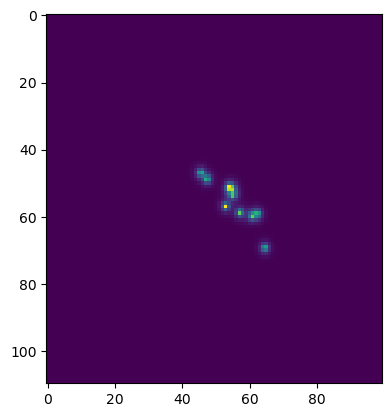

In [24]:
plt.imshow(z)

In [ ]:
# OK, cool, I can work with that.  My range (-10, 10) x (-10, 10) was too big.


In [25]:
def grideval(func):
    xgrid = np.linspace(-3,3,110) # range for flipper length
    ygrid = np.linspace(-3,3,100)  # range for beak length
    xax, yax = np.meshgrid(xgrid, ygrid, indexing="ij")
    z1 = np.zeros(xax.shape); z2 = np.zeros(xax.shape); z3 = np.zeros(xax.shape)
    print(xax.shape, yax.shape, z1.shape)
    for i in range(len(xgrid)):
        for j in range(len(ygrid)):
            x = np.array([xgrid[i], ygrid[j]])
           # print(x)
            z1[i,j]= func(x)[0]
            z2[i,j]= func(x)[1]
            z3[i,j]= func(x)[2]
    return(z1)
z = grideval(shotgun_density)

(110, 100) (110, 100) (110, 100)


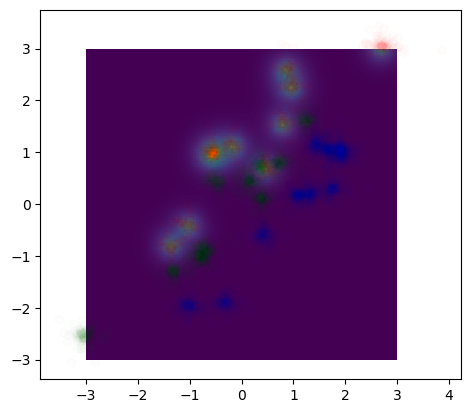

In [31]:
xgrid = np.linspace(-3,3,110) # range for x1
ygrid = np.linspace(-3,3,100)  # range for x2

plt.imshow( z.T, extent = (ygrid[0], ygrid[-1], xgrid[0], xgrid[-1]), origin="lower" )
plt.scatter(points[:,0], points[:,1], c=c, alpha=0.01 )

In [ ]:
# This requires some fiddling to get right; z.T  and origin="lower" by 
# trial and error will do the right thing.

In [32]:
xax, yax = np.meshgrid(ygrid, xgrid)

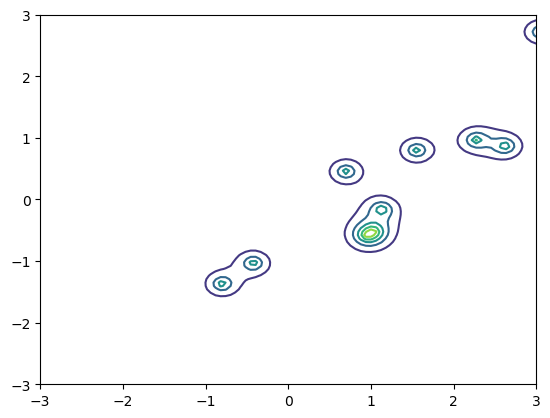

In [33]:
#CS = plt.contourf(xax, yax, z) 
CS = plt.contour(xax, yax, z, levels=6 ) 

#plt.colorbar(cmap="seismic")
#cbar = fig1.colorbar(CS)
#cbar.ax.set_ylabel('verbosity coefficient')
# Add the contour line levels to the colorbar
#cbar.add_lines(CS2)

In [34]:
def grideval(func):
    xgrid = np.linspace(-3,3,110) # range for flipper length
    ygrid = np.linspace(-3,3,100)  # range for beak length
    xax, yax = np.meshgrid(xgrid, ygrid, indexing="ij")
    z1 = np.zeros(xax.shape); z2 = np.zeros(xax.shape); z3 = np.zeros(xax.shape)
    print(xax.shape, yax.shape, z1.shape)
    for i in range(len(xgrid)):
        for j in range(len(ygrid)):
            x = np.array([xgrid[i], ygrid[j]])
           # print(x)
            z1[i,j]= func(x)[0]
            z2[i,j]= func(x)[1]
            z3[i,j]= func(x)[2]
    return(z1,z2,z3)
z1,z2,z3 = grideval(shotgun_density)

(110, 100) (110, 100) (110, 100)


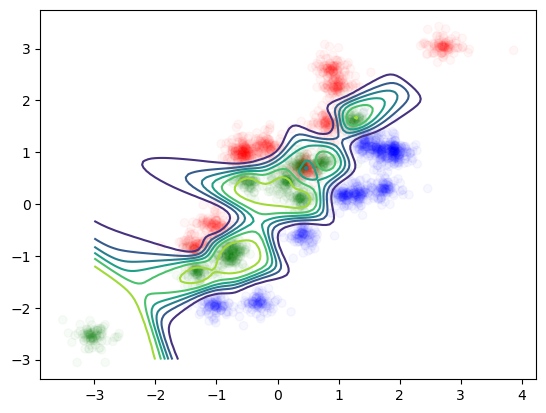

In [37]:
CS = plt.contour(yax, xax, z3/(z1+z2+z3), levels=6, origin="lower" ) 
plt.scatter(points[:,0], points[:,1], c=c, alpha=0.03 )

In [38]:
X = points
Y = labels

In [41]:
X[0:5], Y[0:15]

(array([[ 0.87088505,  2.52080412],
        [-1.03688076, -0.38529439],
        [-0.18121501,  1.13737096],
        [ 2.70298819,  3.05273571],
        [ 0.77358484,  1.68267832]]),
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
clf = LogisticRegression().fit(X,Y)

In [48]:
help(clf)

Help on LogisticRegression in module sklearn.linear_model._logistic object:

class LogisticRegression(sklearn.linear_model._base.LinearClassifierMixin, sklearn.linear_model._base.SparseCoefMixin, sklearn.base.BaseEstimator)
 |  LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
 |  
 |  Logistic Regression (aka logit, MaxEnt) classifier.
 |  
 |  In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
 |  scheme if the 'multi_class' option is set to 'ovr', and uses the
 |  cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
 |  (Currently the 'multinomial' option is supported only by the 'lbfgs',
 |  'sag', 'saga' and 'newton-cg' solvers.)
 |  
 |  This class implements regularized logistic regression using the
 |  'liblinear' library, 'newton-cg', '

In [49]:
clf.predict(X[2])

ValueError: Expected 2D array, got 1D array instead:
array=[-0.18121501  1.13737096].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [52]:
clf.predict(X[14].reshape(1, -1)
           )

array([1])

In [53]:
[clf.predict(X[i].reshape(1,-1)) for i in range(len(X)) ][0:10]

[array([0]),
 array([2]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([2]),
 array([2]),
 array([0])]

In [55]:
Y[0:4]

[0, 0, 0, 0]

In [ ]:
# Hmm.. while this IS the right kind of data, the values don't look right..
# Wasn't it a waltz, 0,1,2,0,1,2,0,1,2 ? 

In [56]:
def grideval_simple(func):
    xgrid = np.linspace(-3,3,110) 
    ygrid = np.linspace(-3,3,100) 
    xax, yax = np.meshgrid(xgrid, ygrid, indexing="ij")
    z1 = np.zeros(xax.shape); z2 = np.zeros(xax.shape); z3 = np.zeros(xax.shape)
    print(xax.shape, yax.shape, z1.shape)
    for i in range(len(xgrid)):
        for j in range(len(ygrid)):
            x = np.array([xgrid[i], ygrid[j]])
           # print(x)
            z1[i,j]= func(x.reshape(1, -1))  # contains a single sample
    return(z1)
zclass = grideval_simple(clf.predict)

(110, 100) (110, 100) (110, 100)


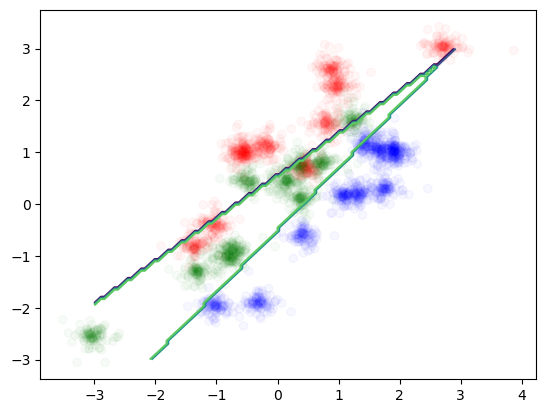

In [57]:
CONTOURCLASS = plt.contour(yax, xax, zclass, levels=3, origin="lower" ) 
plt.scatter(points[:,0], points[:,1], c=c, alpha=0.03 )

In [58]:
# Ouch.  Logistic regression is not working for us here! 
# Maybe a model that can have decision boundaries that are not
# limited to two straight lines?  ? 
from sklearn.ensemble import RandomForestClassifier

In [59]:
rfm = RandomForestClassifier().fit(X,Y)

In [60]:
zclass2 = grideval_simple(rfm.predict)

(110, 100) (110, 100) (110, 100)


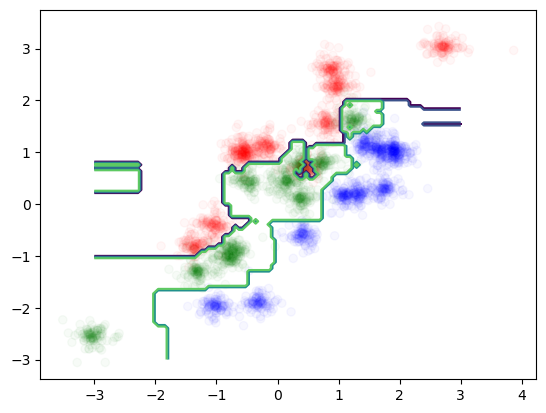

In [61]:
CONTOURCLASS = plt.contour(yax, xax, zclass2, levels=3, origin="lower" ) 
plt.scatter(points[:,0], points[:,1], c=c, alpha=0.03 )